In [1]:
# Import libraries and modules
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import missingno as msno
import seaborn as sns
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
# Load data
dataset_url = 'Cleaned-Data.csv'
data = pd.read_csv(dataset_url)
pd.pandas.set_option('display.max_columns',None)



In [3]:
display("Peeking into Data", data.head())


'Peeking into Data'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China


In [4]:
display("Shape of dataset")
print("Rows:",data.shape[0],"\nColumns:",data.shape[1])

'Shape of dataset'

Rows: 316800 
Columns: 27


In [5]:
display("NULL Values", data.isnull().sum())

'NULL Values'

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [6]:
display("Description",data.describe())

'Description'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,0.090909,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,0.287480,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

<AxesSubplot:ylabel='Density'>

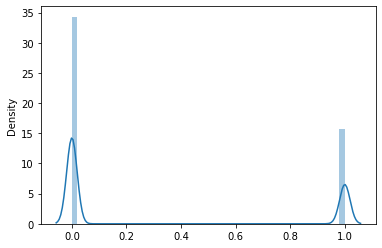

In [8]:
sns.distplot(data.drop('Country',axis=1))

In [9]:
for i in data.columns:
    print("\nColumn Name:",i,"-->",data[i].unique(),"-->Unique Count",len(data[i].unique()))


Column Name: Fever --> [1 0] -->Unique Count 2

Column Name: Tiredness --> [1 0] -->Unique Count 2

Column Name: Dry-Cough --> [1 0] -->Unique Count 2

Column Name: Difficulty-in-Breathing --> [1 0] -->Unique Count 2

Column Name: Sore-Throat --> [1 0] -->Unique Count 2

Column Name: None_Sympton --> [0 1] -->Unique Count 2

Column Name: Pains --> [1 0] -->Unique Count 2

Column Name: Nasal-Congestion --> [1 0] -->Unique Count 2

Column Name: Runny-Nose --> [1 0] -->Unique Count 2

Column Name: Diarrhea --> [1 0] -->Unique Count 2

Column Name: None_Experiencing --> [0 1] -->Unique Count 2

Column Name: Age_0-9 --> [1 0] -->Unique Count 2

Column Name: Age_10-19 --> [0 1] -->Unique Count 2

Column Name: Age_20-24 --> [0 1] -->Unique Count 2

Column Name: Age_25-59 --> [0 1] -->Unique Count 2

Column Name: Age_60+ --> [0 1] -->Unique Count 2

Column Name: Gender_Female --> [0 1] -->Unique Count 2

Column Name: Gender_Male --> [1 0] -->Unique Count 2

Column Name: Gender_Transgender -->

In [10]:
severity_columns = data.filter(like='Severity_').columns
severity_columns

Index(['Severity_Mild', 'Severity_Moderate', 'Severity_None',
       'Severity_Severe'],
      dtype='object')

In [11]:
data['Severity_None'].replace({1:'None',0:'No'},inplace =True)
data['Severity_Mild'].replace({1:'Mild',0:'No'},inplace =True)
data['Severity_Moderate'].replace({1:'Moderate',0:'No'},inplace =True)
data['Severity_Severe'].replace({1:'Severe',0:'No'},inplace =True)

In [12]:
data['Condition']=data[severity_columns].values.tolist()

In [13]:
def removing(list1):
    list1 = set(list1) 
    list1.discard("No")
    a = ''.join(list1)
    return a

In [14]:
data['Condition'] = data['Condition'].apply(removing)
data['Condition'].unique()



array(['Mild', 'Moderate', 'Severe', 'None'], dtype=object)

In [15]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Condition']= label_encoder.fit_transform(data['Condition']) 
data['Condition']

0         0
1         0
2         0
3         1
4         1
         ..
316795    3
316796    3
316797    2
316798    2
316799    2
Name: Condition, Length: 316800, dtype: int32

In [16]:
age_columns = data.filter(like='Age_').columns
gender_columns = data.filter(like='Gender_').columns
contact_columns = data.filter(like='Contact_').columns

In [17]:
No_risk_age = data.groupby(['Severity_None'])[age_columns].sum()
No_risk_gender = data.groupby(['Severity_None'])[gender_columns].sum()
No_risk_contact = data.groupby(['Severity_None'])[contact_columns].sum()

In [18]:
Low_risk_age = data.groupby(['Severity_Mild'])[age_columns].sum()
Low_risk_gender = data.groupby(['Severity_Mild'])[gender_columns].sum()
Low_risk_contact = data.groupby(['Severity_Mild'])[contact_columns].sum()

In [19]:
Moderate_risk_age = data.groupby(['Severity_Moderate'])[age_columns].sum()
Moderate_risk_gender = data.groupby(['Severity_Moderate'])[gender_columns].sum()
Moderate_risk_contact = data.groupby(['Severity_Moderate'])[contact_columns].sum()

In [20]:
Severe_risk_age = data.groupby(['Severity_Severe'])[age_columns].sum()
Severe_risk_gender = data.groupby(['Severity_Severe'])[gender_columns].sum()
Severe_risk_contact = data.groupby(['Severity_Severe'])[contact_columns].sum()

In [21]:
#sns.countplot(data['Condition'])


In [22]:
# Target features
y =data['Condition'] #data[['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe']]

# Input features
X = data[['Fever','Tiredness','Dry-Cough','Difficulty-in-Breathing','Sore-Throat', 'None_Sympton', 'Pains','Runny-Nose', 'Diarrhea']]#,
              
#"Age_0-9", "Age_10-19", "Age_20-24", "Age_25-59", "Age_60+", "Gender_Female", "Gender_Male", "Gender_Transgender"]]




In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=123,
                                                    stratify=y)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("y_train Shape : ",y_train.shape)
print("y_test Shape : ",y_test.shape)

X_train Shape :  (253440, 9)
X_test Shape :  (63360, 9)
y_train Shape :  (253440,)
y_test Shape :  (63360,)


In [24]:
y_train

241937    1
269823    1
102397    0
43952     3
203033    1
         ..
1002      3
164406    3
79313     1
258325    0
67947     1
Name: Condition, Length: 253440, dtype: int32

In [27]:
# DecisionTree
from sklearn.multioutput import MultiOutputClassifier

DecisionTree = DecisionTreeClassifier(max_depth=100, min_samples_split=4,
    random_state=0)
#DecisionTree = MultiOutputClassifier(DecisionTree, n_jobs=-1)
scores = cross_val_score(DecisionTree, X, y, cv=5)
print('DecisionTree scores.mean: ', scores)

DecisionTree = DecisionTree.fit(X_train, y_train)
pred = DecisionTree.predict(X_test)
print('DecisionTree r2_score: ',r2_score(y_test, pred))

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred, normalize=True)


DecisionTree scores.mean:  [0.25 0.25 0.25 0.25 0.25]
DecisionTree r2_score:  -1.047689393939394


0.23129734848484848

In [26]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf =  SVC(gamma='auto')
clf.fit(X_train, y_train)
predSvm = clf.predict(X_test)
print('SVM: ', r2_score(y_test, predSvm))

SVM:  -1.0017424242424244
